# Informações

- nomes: Raphael Leite da Costa Nascimento e Adriel Dos Sandos Araujo Cabral
- matrículas: 20190038319 e 20190034839
- Disciplina: Visualização de Dados

# Importações

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montando o data frame princial

In [2]:
data_path = 'dados'
files = [os.path.join(data_path, file) for file in os.listdir(data_path)]
files

['dados\\datatran2007.csv',
 'dados\\datatran2008.csv',
 'dados\\datatran2009.csv',
 'dados\\datatran2010.csv',
 'dados\\datatran2011.csv',
 'dados\\datatran2012.csv',
 'dados\\datatran2015.csv',
 'dados\\datatran2016.csv',
 'dados\\datatran2017.csv',
 'dados\\datatran2018.csv',
 'dados\\datatran2020.csv']

Criando uma lista de data frames e depois unindo todos em um so

In [3]:
dataframes = []

for file in files:
    try:
        dataframes.append(pd.read_csv(file, delimiter=';'))
    except:
        dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))

df_final = pd.concat(dataframes, ignore_index=True)
df_sem_duplicatas = df_final.drop_duplicates(subset='id')
df_sem_duplicatas['count'] = 1

C:\Users\Adriel\AppData\Local\Temp\ipykernel_7096\698160551.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))
C:\Users\Adriel\AppData\Local\Temp\ipykernel_7096\698160551.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))
C:\Users\Adriel\AppData\Local\Temp\ipykernel_7096\698160551.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))
C:\Users\Adriel\AppData\Local\Temp\ipykernel_7096\698160551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

# Tratando os valores nulos 

Substituindo os valores nulos da coluna 'ano' pelo ano da coluna 'data_inversa'

In [4]:
def get_ano(year):
    
    regex1 = r'([0-9]+)(-[0-9]+)(-[0-9]+)'
    regex2 = r'([0-9])+/([0-9])+/([0-9]+)'
    
    if '-' in year:
        return int(re.search(regex1, year).group(1))
    else:
        return int('20' + re.search(regex2, year).group(3))

In [5]:
df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'ano'] = df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'data_inversa'].apply(get_ano)

In [6]:
df_sem_duplicatas['ano'].unique()

array([2007., 2008., 2009., 2010., 2011., 2012., 2015., 2016., 2017.,
       2018., 2020.])

In [7]:
df_sem_duplicatas[['ano']].isnull().sum()

ano    0
dtype: int64

In [8]:
df_sem_duplicatas.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'count'],
      dtype='object')

In [9]:
df_sem_duplicatas

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,count
0,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,5,0,4,6,NaN,NaN,NaN,NaN,NaN,1
2,1032898.0,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,2,0,1,1,NaN,NaN,NaN,NaN,NaN,1
3,1051130.0,12/02/2007,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,Atropelamento de animal,...,0,0,3,1,NaN,NaN,NaN,NaN,NaN,1
4,1066824.0,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,1
5,1069918.0,16/12/2007,Domingo,17:40:00,MA,230,14.0,BARAO DE GRAJAU,Outras,Capotamento,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428437,347870.0,2020-12-21,segunda,10:45:00,PI,135.0,404,REDENCAO DO GURGUEIA,Falta de Atenção à Condução,Saída de leito carroçável,...,1,0,0,1,"-9,43674092","-44,59787172",SR-PI,UOP02,DEL03,1
1428449,348216.0,2020-11-19,quinta,16:30:00,MA,226.0,429,GRAJAU,Manobra de mudança de faixa,Colisão frontal,...,0,0,2,2,"-5,83952584","-46,21364594",SR-MA,UOP02,DEL04,1
1428461,348821.0,2020-12-10,quinta,19:30:00,PR,277.0,"667,1",MEDIANEIRA,Falta de Atenção à Condução,Tombamento,...,1,0,1,2,"-25,26577498","-54,05432901",SR-PR,UOP02,DEL05,1
1428477,350229.0,2020-10-20,terça,08:00:00,MA,135.0,5,SAO LUIS,Não guardar distância de segurança,Colisão traseira,...,4,0,1,4,"-2,62145385","-44,25797421",SR-MA,UOP01,DEL01,1


In [10]:
df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007.0,127671
1,2008.0,141038
2,2009.0,158646
3,2010.0,183465
4,2011.0,192322
5,2012.0,184561
6,2015.0,122158
7,2016.0,96362
8,2017.0,89516
9,2018.0,63316


# Graficos

In [11]:

plt.style.use('seaborn')
my_blue = '#1e83af'
my_red = '#9c1416'
my_green = '#1a7512'
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [38]:
def grafico_simples(data: pd.core.frame.DataFrame, eixo_x: str, eixo_y: str, title:str) -> None:
    
    X, Y = data[eixo_x], data[eixo_y].values

    plt.title(title)
    plt.bar(X, Y, color=my_blue, label=eixo_y, width=0.6)
    addlabels(X, Y)
    plt.legend(loc="upper right")
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
    plt.xticks(rotation=45)
    plt.show()

In [14]:
df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007.0,127671
1,2008.0,141038
2,2009.0,158646
3,2010.0,183465
4,2011.0,192322
5,2012.0,184561
6,2015.0,122158
7,2016.0,96362
8,2017.0,89516
9,2018.0,63316


## Gráfico da queda dos acidentes 

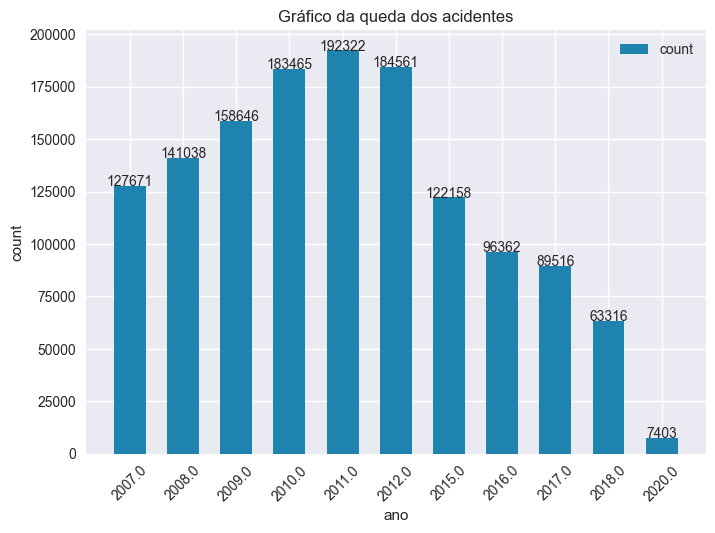

In [15]:
df_acidentes_count = df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()


df_acidentes_count = df_acidentes_count.astype({'ano': str})
#df_acidentes_count['ano'] = pd.to_string(df_acidentes_count['ano'])

grafico_simples(df_acidentes_count, 'ano', 'count', 
                'Gráfico da queda dos acidentes')


## Gráfico de causas de acidente 2011

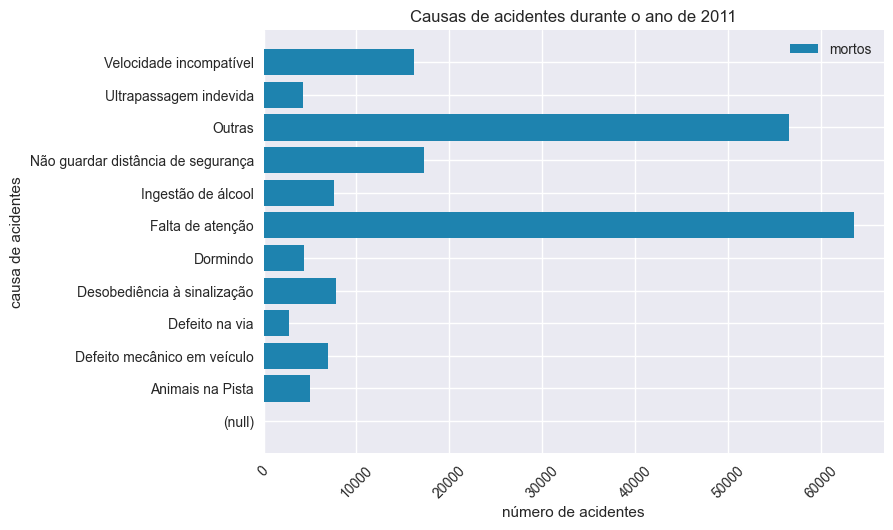

In [40]:
df_graph = df_sem_duplicatas.loc[df_sem_duplicatas['ano'] == 2011].groupby('causa_acidente')['count'].sum().reset_index()
#grafico_simples(df_graph, 'causa_acidente', 'mortos', 'Gráfico de causas de acidente 2011')

plt.title('Causas de acidentes durante o ano de 2011')
plt.barh(df_graph['causa_acidente'], df_graph['count'].values, color=my_blue, label='mortos')
plt.legend(loc="upper right")
plt.xlabel('número de acidentes')
plt.ylabel('causa de acidentes')
plt.xticks(rotation=45)
plt.show()

In [33]:
acidentes_by_uf = df_sem_duplicatas.groupby('uf')['count'].sum().reset_index()
acidentes_by_uf = acidentes_by_uf.sort_values('count', ascending=False).reset_index(drop=True)
acidentes_by_uf

,uf,count
0,MG,201917
1,SC,149020
2,PR,138813
3,RJ,117773
4,RS,105983
5,SP,102806
6,BA,74027
7,GO,61973
8,ES,56576
9,PE,53788


### Os 5 estados que acontecem mais acidentes + PB

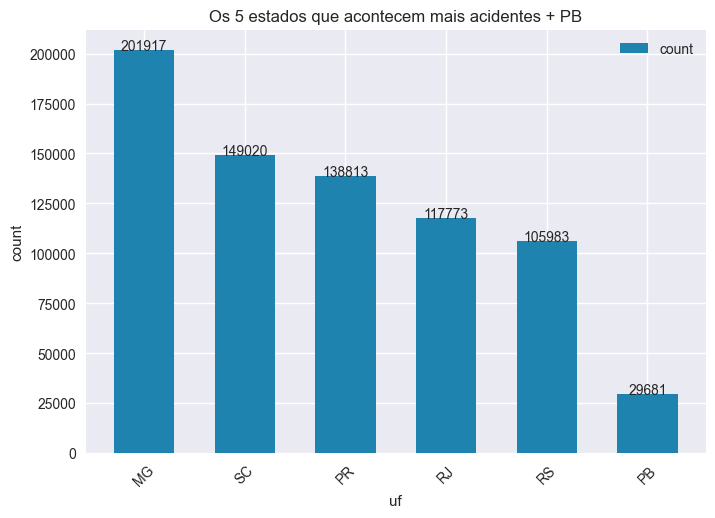

In [39]:
grafico_simples(acidentes_by_uf.loc[acidentes_by_uf['uf'].isin(['MG', 'SC', 'PR', 'RJ', 'RS', 'PB'])], 'uf', 'count', 
                'Os 5 estados que acontecem mais acidentes + PB')

## Gráficos da Paraiba

In [19]:
df_sem_duplicatas_PB = df_sem_duplicatas.loc[df_sem_duplicatas['uf'] == 'PB'].reset_index(drop=True)

In [20]:
df_sem_duplicatas_PB['municipio'] = df_sem_duplicatas_PB['municipio'].map(lambda nome: nome.strip())

In [21]:

df_pessoas = df_sem_duplicatas_PB.groupby(['ano'])['pessoas'].sum().reset_index()
df_mortos = df_sem_duplicatas_PB.groupby(['ano'])['mortos'].sum().reset_index()
df_feridos = df_sem_duplicatas_PB.groupby(['ano'])['feridos'].sum().reset_index()
df_ilesos = df_sem_duplicatas_PB.groupby(['ano'])['ilesos'].sum().reset_index()


anos = df_mortos['ano'].values
anos = [str(ano) for ano in anos]

In [22]:
df_total_pessoas = pd.concat([df_pessoas, 
                              df_mortos.drop(columns=['ano']), 
                              df_feridos.drop(columns=['ano']), 
                              df_ilesos.drop(columns=['ano'])], 1)

C:\Users\Adriel\AppData\Local\Temp\ipykernel_7096\92345214.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total_pessoas = pd.concat([df_pessoas,


In [23]:
df_total_pessoas

,ano,pessoas,mortos,feridos,ilesos
0,2007.0,5853,164,1898,3618
1,2008.0,7027,185,2130,4366
2,2009.0,7592,202,2314,4703
3,2010.0,8048,194,2315,5096
4,2011.0,8202,176,2429,5148
5,2012.0,8542,223,2565,5324
6,2015.0,5874,170,2075,3235
7,2016.0,4335,156,1790,1995
8,2017.0,4343,139,1770,2116
9,2018.0,3386,119,1538,1396


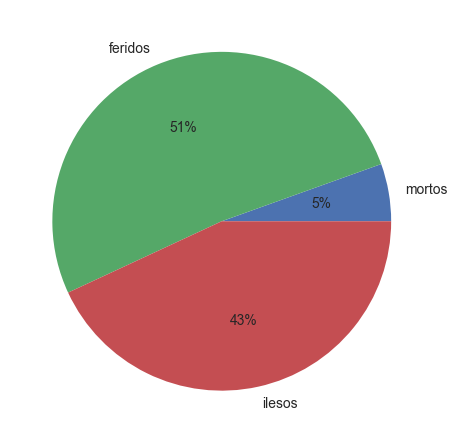

In [24]:
plt.pie(df_total_pessoas.iloc[10, 2:], labels = df_total_pessoas.columns[2:], autopct='%.0f%%')
plt.show()

### Número de mortos, feridos e ilesos a cada ano na Paraíba

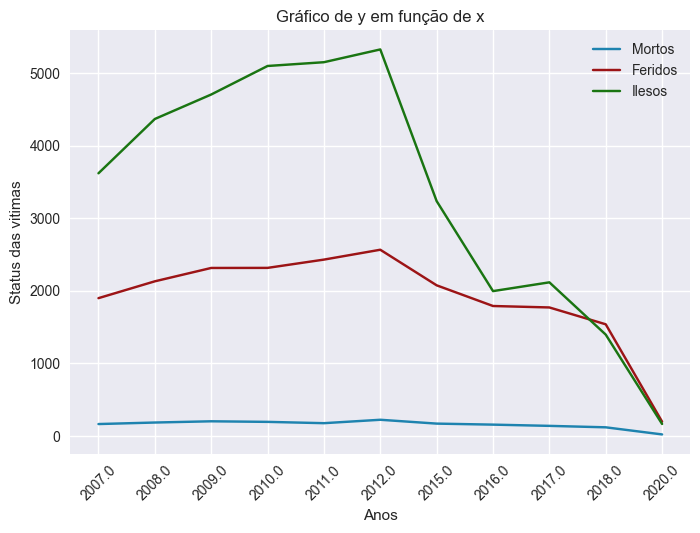

In [25]:
plt.title('Gráfico de y em função de x')
plt.plot(anos, df_mortos['mortos'].values, '-', color=my_blue, label="Mortos")
plt.plot(anos, df_feridos['feridos'].values, '-', color=my_red, label="Feridos")
plt.plot(anos, df_ilesos['ilesos'].values, '-', color=my_green, label="Ilesos")
plt.legend(loc="upper right")
plt.xlabel('Anos')
plt.ylabel('Status das vitimas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
df_sem_duplicatas_PB

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,count
0,174007.0,01/01/2007,Segunda,18:30:00,PB,230,153.4,CAMPINA GRANDE,Outras,Colisão Transversal,...,2,0,2,2,NaN,NaN,NaN,NaN,NaN,1
1,174064.0,02/01/2007,Terça,02:20:00,PB,101,85.9,BAYEUX,Animais na Pista,Atropelamento de animal,...,2,0,2,2,NaN,NaN,NaN,NaN,NaN,1
2,174133.0,02/01/2007,Terça,07:35:00,PB,230,138.2,CAMPINA GRANDE,Outras,Saída de Pista,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,1
3,174141.0,01/01/2007,Segunda,16:30:00,PB,101,112.9,ALHANDRA,Ultrapassagem indevida,Colisão frontal,...,0,0,1,2,NaN,NaN,NaN,NaN,NaN,1
4,174304.0,02/01/2007,Terça,11:30:00,PB,230,136.6,CAMPINA GRANDE,Outras,Capotamento,...,0,0,2,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29676,327181.0,2020-12-11,sexta,17:30:00,PB,230.0,12,CABEDELO,Falta de Atenção à Condução,Colisão traseira,...,1,0,1,2,"-7,068","-34,85",SR-PB,UOP01,DEL01,1
29677,327563.0,2020-12-13,domingo,03:20:00,PB,104.0,"101,6",ESPERANCA,Velocidade Incompatível,Colisão com objeto estático,...,0,0,1,1,"-7,057146","-35,853988",SR-PB,UOP04,DEL02,1
29678,329332.0,2020-12-20,domingo,21:15:00,PB,104.0,142,QUEIMADAS,Avarias e/ou desgaste excessivo no pneu,Saída de leito carroçável,...,0,0,3,1,"-7,39577502","-35,89744631",SR-PB,UOP03,DEL02,1
29679,329409.0,2020-12-21,segunda,06:05:00,PB,230.0,440,APARECIDA,Condutor Dormindo,Colisão frontal,...,1,0,0,2,"-6,765","-38,0269",SR-PB,UOP02,DEL03,1


In [27]:
def split_time(time):
    
    time_int = int(''.join(time.split(':')[:2]))
    
    if 0 < time_int < 600:
        return '00-06'
    elif 600 < time_int < 800:
        return '06-08'
    elif 800 < time_int < 1200:
        return '08-12'
    elif 1200 < time_int < 1600:
        return '12-16'
    elif 1600 < time_int < 2000:
        return '16-20'
    elif 2000 < time_int < 2400:
        return '20-24'


In [28]:
df_sem_duplicatas_PB['time_split'] = df_sem_duplicatas_PB['horario'].apply(lambda time: split_time(time), 1)

In [29]:
df_sem_duplicatas_PB['time_split'].value_counts()

16-20    8162
12-16    5357
08-12    5321
20-24    3399
00-06    3223
06-08    2928
Name: time_split, dtype: int64

<AxesSubplot:xlabel='time_split', ylabel='pessoas'>

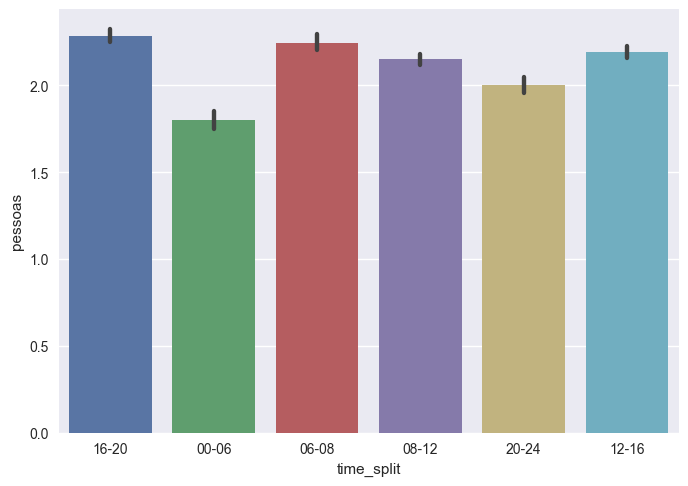

In [30]:
sns.barplot(data=df_sem_duplicatas_PB, x='time_split', y='pessoas')